In [1]:
#Importing the required libraries ands set
import time
import numpy as np
from qiskit import *
from qiskit.circuit import Parameter
from qiskit.quantum_info import Statevector, Pauli, SparsePauliOp
from qiskit.circuit.library import RealAmplitudes
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
from qiskit.tools.visualization import plot_histogram
# %config InlineBackend.figure_format='retina'
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Options, Sampler, Estimator


In [8]:
def bernstein_vazirani(string):
    
    # Save the length of string
    string_length = len(string)
    
    # Make a quantum circuit
    qc = QuantumCircuit(string_length+1, string_length)
    
    # Initialize each input qubit to apply a Hadamard gate and output qubit to |->
    
    qc.x(string_length)
    qc.h(string_length)
    for i in range(string_length):
        qc.h(i)
    
    #
    
    # Apply an oracle for the given string
    # Note: In Qiskit, numbers are assigned to the bits in a string from right to left
    s = string[::-1]
    for q in range(string_length):
        if s[q] == '0':
            qc.i(q)
        else:
            qc.cx(q, string_length)

    
    # Apply Hadamard gates after querying the oracle
    for i in range(string_length):
        qc.h(i)

    
    # Measurement
    qc.measure(range(string_length), range(string_length))
    
    return qc

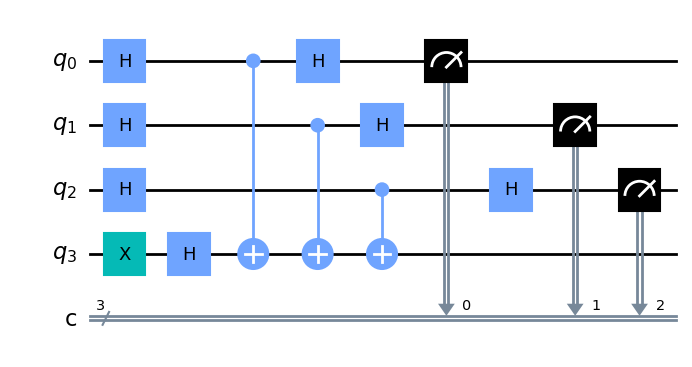

In [9]:
#example if we enter the hidden string '111' , you can test this using any bitstrings of 0 and 1 
qc1 = bernstein_vazirani('111')
display(qc1.draw(output="mpl"))